In [231]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score

In [232]:
plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

# 1. Les Fonctions

In [233]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [234]:
# Définition du modèle
def model(X, W, b):
    Z = X.dot(W) + b
    # print(Z.min())
    A = 1 / (1 + np.exp(-Z))
    return A

In [235]:
# La fonction coût
def log_loss(A, y):
    epsilon = 1e-15
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [236]:
# Le calcul des Gradients
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [237]:
# Les mises à jours nécessaires au modèle
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [238]:
# Faire les prédictions
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [239]:
from tqdm import tqdm # tqdm vient de l'arabe takaduma = progression

In [240]:
# Pour voir si notre modèle est en overfiting, on va aussi 
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.1, n_iter = 100):
    # initialisation W, b
    W, b = initialisation(X_train)

    # Deux listes de loss et accuracy des données d'entrainement
    train_loss = []
    # Peformance du modèle
    train_acc = []

    # Deux listes de loss et accuracy des données de test
    test_loss = []
    test_acc = []

    # Il faut ajouter une barre de progression "tqdm" lorsque l'on exécute un code très long
    for i in tqdm(range(n_iter)):
        A_train = model(X_train, W, b)

        # Ajouter une condition lorsque nous avons assez d'itérations
        if i %10 == 0: # si l'iter est un multiple de 10 on effectue le calcul
            # Le Train
            train_loss.append(log_loss(A_train, y_train))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            # Le Test
            A_test = model(X_test, W, b) # Activation du Test
            test_loss.append(log_loss(A_test, y_test))
            y_pred = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred))

        # Calcul des Gradients basé uniquement sur les données du Train
        dW, db = gradients(A_train, X_train, y_train)
        # mise a jour des données
        W, b = update(dW, db, W, b, learning_rate)


    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.title("Loss")
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test acc')
    plt.title("Accuracy")
    plt.legend()
    plt.show()

    return (W, b)

# 2. Le Data Set

Dimensions de X : (100, 2)
Dimensions de y : (100, 1)


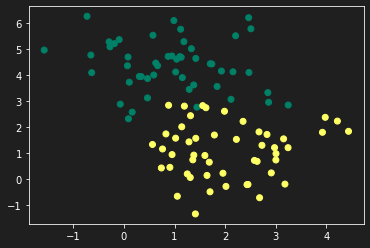

In [241]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print("Dimensions de X :", X.shape)
print("Dimensions de y :", y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

In [242]:
# il faut se refaire à la 1ère fonction pour voir le résultat 
# W, b = artificial_neuron(X, y)

In [243]:
# Une bibliothèque permetant de gerer les fichiers
import h5py

In [244]:
# Fonction de chargement de données

def load_data():
    train_dataset = h5py.File('trainset.hdf5', "r")
    X_train = np.array(train_dataset["X_train"][:]) # your train set features
    y_train = np.array(train_dataset["Y_train"][:]) # your train set labels

    test_dataset = h5py.File('testset.hdf5', "r")
    X_test = np.array(test_dataset["X_test"][:]) # your train set features
    y_test = np.array(test_dataset["Y_test"][:]) # your train set labels
    
    return X_train, y_train, X_test, y_test

In [245]:
# Création des données d'entrainement et de test
X_train, y_train, X_test, y_test = load_data()

In [246]:
# Examiner les dimensions des données d'entrainement
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True)) # le nbre d'étiquettes

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [247]:
# Examiner les dimensions des données de test
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True)) # le nbre d'étiquettes

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


C:\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



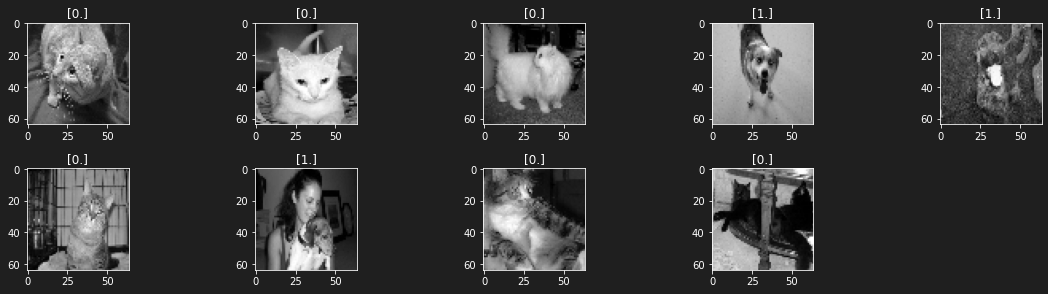

In [248]:
plt.figure(figsize=(16, 8))
for i in range(1, 10): # Affichage des 16 premières photos
    plt.subplot(4, 5, i) 
    plt.imshow(X_train[i], cmap="gray")
    plt.title(y_train[i]) # Le titre de l'image par rapport à la catégorie de l'objet
    plt.tight_layout()
plt.show()

### Entrainement du Modèle

In [249]:
# Il faut tout d'abord applatir les images (les mettre en 2D)

# Pour normaliser les données on va utiliser la normalisation MinMax : X = X - Min(X)/Max(X) - Min(X)
X_train_reshape = X_train.reshape(X_train.shape[0], -1) / X_train.max() # -1 signifie tout ce qui reste à réorganiser après le 1er shape
X_train_reshape.shape 

(1000, 4096)

In [250]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1) / X_test.max() # -1 signifie tout ce qui reste à réorganiser après le 1er shape
X_test_reshape.shape

(200, 4096)

100%|██████████| 1000/1000 [00:04<00:00, 203.60it/s]


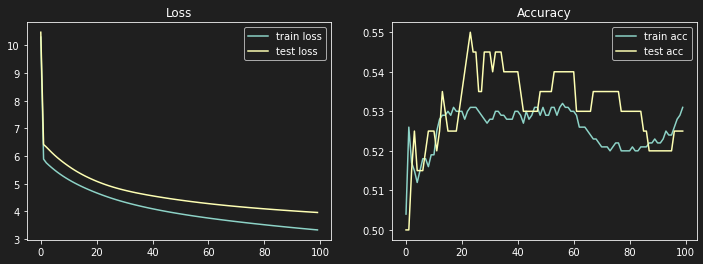

In [251]:
# La fonction expo utilisée dans le modèle est en overflow (valeur trop grande et ne (expo) peut retournée par la vrai val )
W, b = artificial_neuron(X_train_reshape, y_train, X_test_reshape, y_test, learning_rate=0.01, n_iter=1000)

## 1. Normaliser les données
- ***Mettre sur une même échelle les variables, cela fera évoluer la fonction coût de façon similaire sur tous ses paramètres. En fin, l'algorithme de Descente Gradient aura une bonne convergence***

#### Avant tout essayons une petite expérience sur la normalisation de données

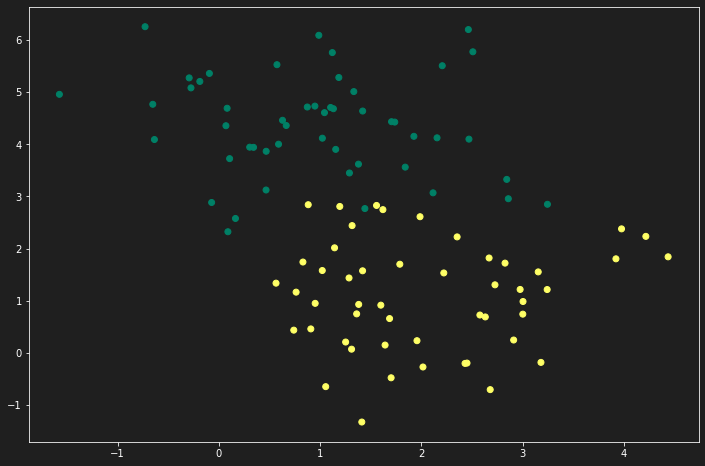

In [252]:
# Construction du Data set
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
X[:, 1] = X[:, 1] * 1
# Redimensionner la variable y pour qu'elle prenne 100 lignes et une colonne
y = y.reshape((y.shape[0], 1))

# Visualisation des deux 1eres ocurrences de ma variable X
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer")
plt.show()

In [253]:
def artificial_neuron_2(X, y, learning_rate=0.1, n_iter=1000):

  W, b = initialisation(X)
  W[0], W[1] = -7.5, 7.5

  nb = 1
  j=0
  history = np.zeros((n_iter // nb, 5))

  A = model(X, W, b)
  Loss = []
  

  Params1 = [W[0]]
  Params2 = [W[1]]
  Loss.append(log_loss(y, A))
  
  # Training
  for i in range(n_iter):
    A = model(X, W, b)
    Loss.append(log_loss(y, A))
    Params1.append(W[0])
    Params2.append(W[1])
    dW, db = gradients(A, X, y)
    W, b = update(dW, db, W, b, learning_rate = learning_rate)

    if (i % nb == 0):  
      history[j, 0] = W[0]
      history[j, 1] = W[1]
      history[j, 2] = b
      history[j, 3] = i
      history[j, 4] = log_loss(y, A)
      j +=1

  plt.plot(Loss)
  plt.show()

  return history, b, Loss, Params1, Params2

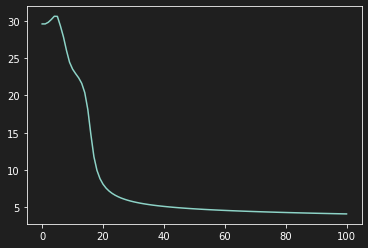

In [254]:
# Entrainer le 2nd réseau de neuronne
history, b, Loss, Params1, Params2 = artificial_neuron_2(X, y, learning_rate=0.6, n_iter=100)

In [255]:
# Traçons l'évolution de la fonction coût en fonction des params W1 et W2

# Définir une rangée de variables
limite  = 10
h = 100
W1 = np.linspace(-limite, limite, h)
W2 = np.linspace(-limite, limite, h)

# Combiner les deux tableaux pour faire une grille de configurations
W11, W22 = np.meshgrid(W1, W2)

# Afin d'avoir une seule variable W, on va concatener W11 et W22
# tout en les applatissant et en transposant W_final pour avoir la dimension voulue
W_final = np.c_[W11.ravel(), W22.ravel()].T
W_final.shape

(2, 10000)

In [256]:
b = 0
# Passer cette grille de configurations dans la fonctions Z
Z = X.dot(W_final) + b
# Activation
A = 1 / (1 + np.exp(-Z))

# Les dimensions de X et W_final doivent être respectivement : (100, 2) et (2, 10000)
# La sortie A contient 10 000 configurations de 100 réponses possibles

# Pour obtnir 10 000 (100 valeurs de W1 et de W2) coût différents, on va procéder de la manière suivante:

epsilon = 1e-15 # le coût sera impacté y compris la courbe de visualisation
# On peut prendre W11 tout comme W22 car, tous les deux ont les mêmes dimensions
L = 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon), axis=0).reshape(W11.shape)
L.shape

(100, 100)

Z = X.dot(W_final) + b
A = 1 / (1 + np.exp(-Z))

epsilon = 1e-15
L = 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon), axis=0).reshape(W11.shape)
L.shape

In [257]:
from matplotlib.animation import FuncAnimation

In [258]:
def animate(params):
  W0 = params[0]
  W1 = params[1]
  b = params[2]
  i = params[3]
  loss = params[4]
  

  # ax[0].clear() # frontiere de décision
  # ax[1].clear() # sigmoide
  # ax[2].clear() # fonction Coût
  
  ax[0].contourf(W11, W22, L, 20, cmap='magma', zorder=-1)
  ax[0].scatter(Params1[int(i)], Params2[int(i)], c='r', marker='x', s=50, zorder=1)
  ax[0].plot(Params1[0:int(i)], Params2[0:int(i)], lw=3, c='r', zorder=1)

  ax[1].plot(Loss[0:int(i)], lw=3, c='white')
  ax[1].set_xlim(0, len(Params1))
  ax[1].set_ylim(min(Loss) - 2, max(Loss) + 2)
  

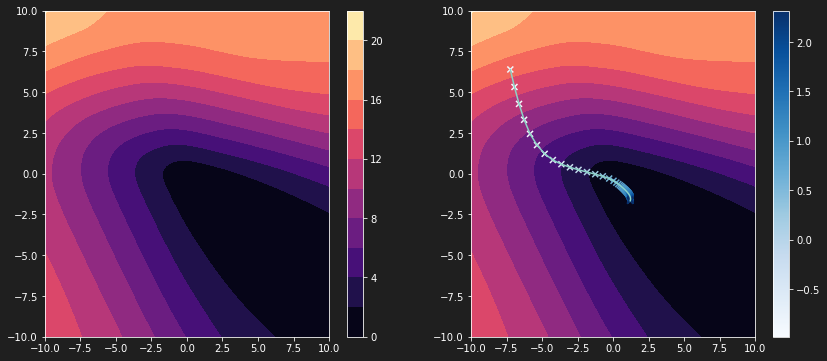

In [259]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.contourf(W11, W22, L, 10, cmap='magma')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(W11, W22, L, 10, cmap='magma')
plt.scatter(history[:, 0], history[:, 1], c=history[:, 2], cmap='Blues', marker='x')
plt.plot(history[:, 0], history[:, 1])
# plt.plot(history[:, 0], history[:, 1], c='r')
plt.colorbar()
plt.show()

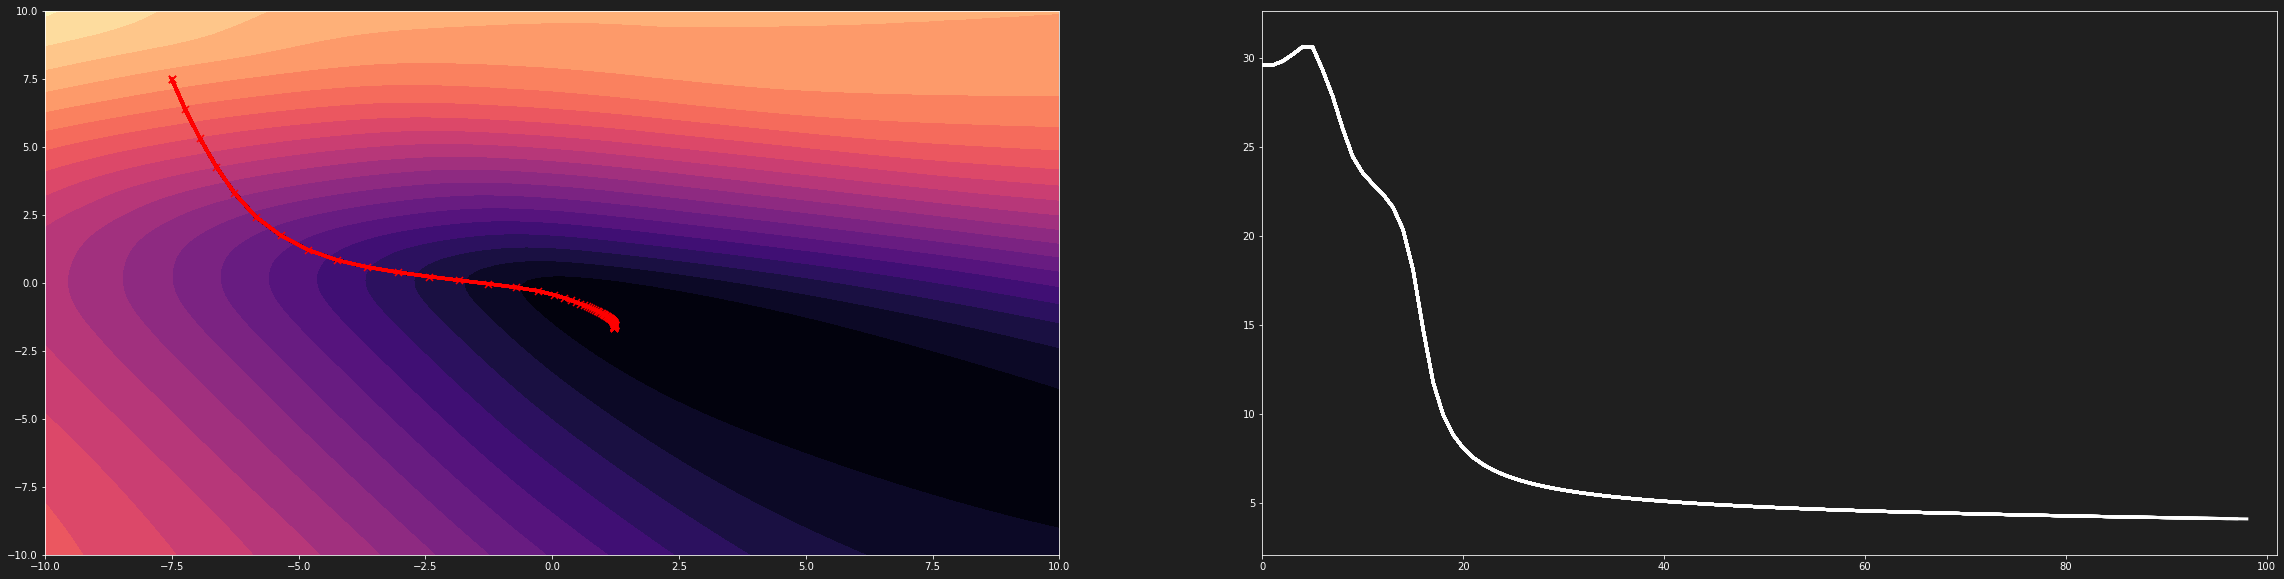

In [260]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(40, 10))
anim = FuncAnimation(fig, animate, frames=history, interval=10, repeat=False)

import matplotlib.animation as animation
Writer = animation.writers["ffmpeg"]
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=3200)
anim.save('animation3.mp4', writer=writer)

In [261]:
import plotly.graph_objects as go

fig = (go.Figure(data=[go.Surface(z=L, x=W11, y=W22, opacity = 1)]))

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()